<a href="https://colab.research.google.com/github/davifebdn/hipotesis_testing/blob/main/Tasca_M5_T01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M5 T01
Exercicis d'Hipotesis Testing.

##Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [10]:
#Importació
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Càrrega de les dades
uefa = pd.read_csv("/content/drive/MyDrive/IT Academy/Data Science/Sprint 5. Introducció al Test d'Hipòtesis i al Machine Learning/M5T01/Lligues europees UEFA.csv", sep=';',encoding="ISO-8859-1")
uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


La càrrega del dataset donava l'error `UnicodeDecodeError: 'utf-8' codec can't decode bytes in position...`, s'ha hagut de codificar amb ISO `ISO-8859-1` i separador `;`.



A continuació, abans de començar amb la tasca, fem un breu anàlisi del dataset.

In [3]:
uefa.shape

(98, 21)

La base té 98 files i 21 col·lumnes.

Aquí expliquem el significat de cada columna:

* **Rk**: Ranking, possició en la que ha quedat l'equip, relacionat a la columna Pts.
* **Squad**: Nom de l'equip.
* **Country**: País de l'equip.
* **LgRk**: League Ranking, possició de l'equip a la lliga del seu país.
* **MP**: Matches Played, partis jugats.
* **W**: Wins, partits guanyats.
* **D**: Draws, partis empatats.
* **L**: Losses, partits perduts.
* **GF**:	Goals For, gols a favor.
* **GA**:	Goals Against, gols en contra.
* **GD**:	Goal Difference, és la resta de les dues anteriors columnes.
* **Pts**: Points. Els punts totals dels partits guanyats (3 punts) i els empatats (1 punt).
* **Pts/G**: Points/Game, mitjana de punts per cada partit. 
* **xG**: Expected Goal, probabilitat de gol.
* **xGA**: Expected Goal Against, probabilitat de gol en contra.
* **xGD**: Expected Goal Difference, diferència de probabilitat, és la resta de les dues columnes anteriors.
* **xGD/90**: La diferència de probabilitat cada 90 minuts (la duració d'un partit).
* **Last 5**:	Resultat dels últims 5 partits (W, D o L).
* **Attendance**: Quantitat d'espectadors que han anat al camp.
* **Top Team Scorer**: Jugador que més gols ha marcat.
* **Goalkeeper**: Porter.

El significat de les columnes de probabilitat ho he trobat [aquí](https://expectedscore.com/faq/how-to-use-the-xg-tables/).

In [4]:
uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Aquí veiem el tipus de dada que hi ha a cada columna i que, a més, no hi ha cap celda buida.

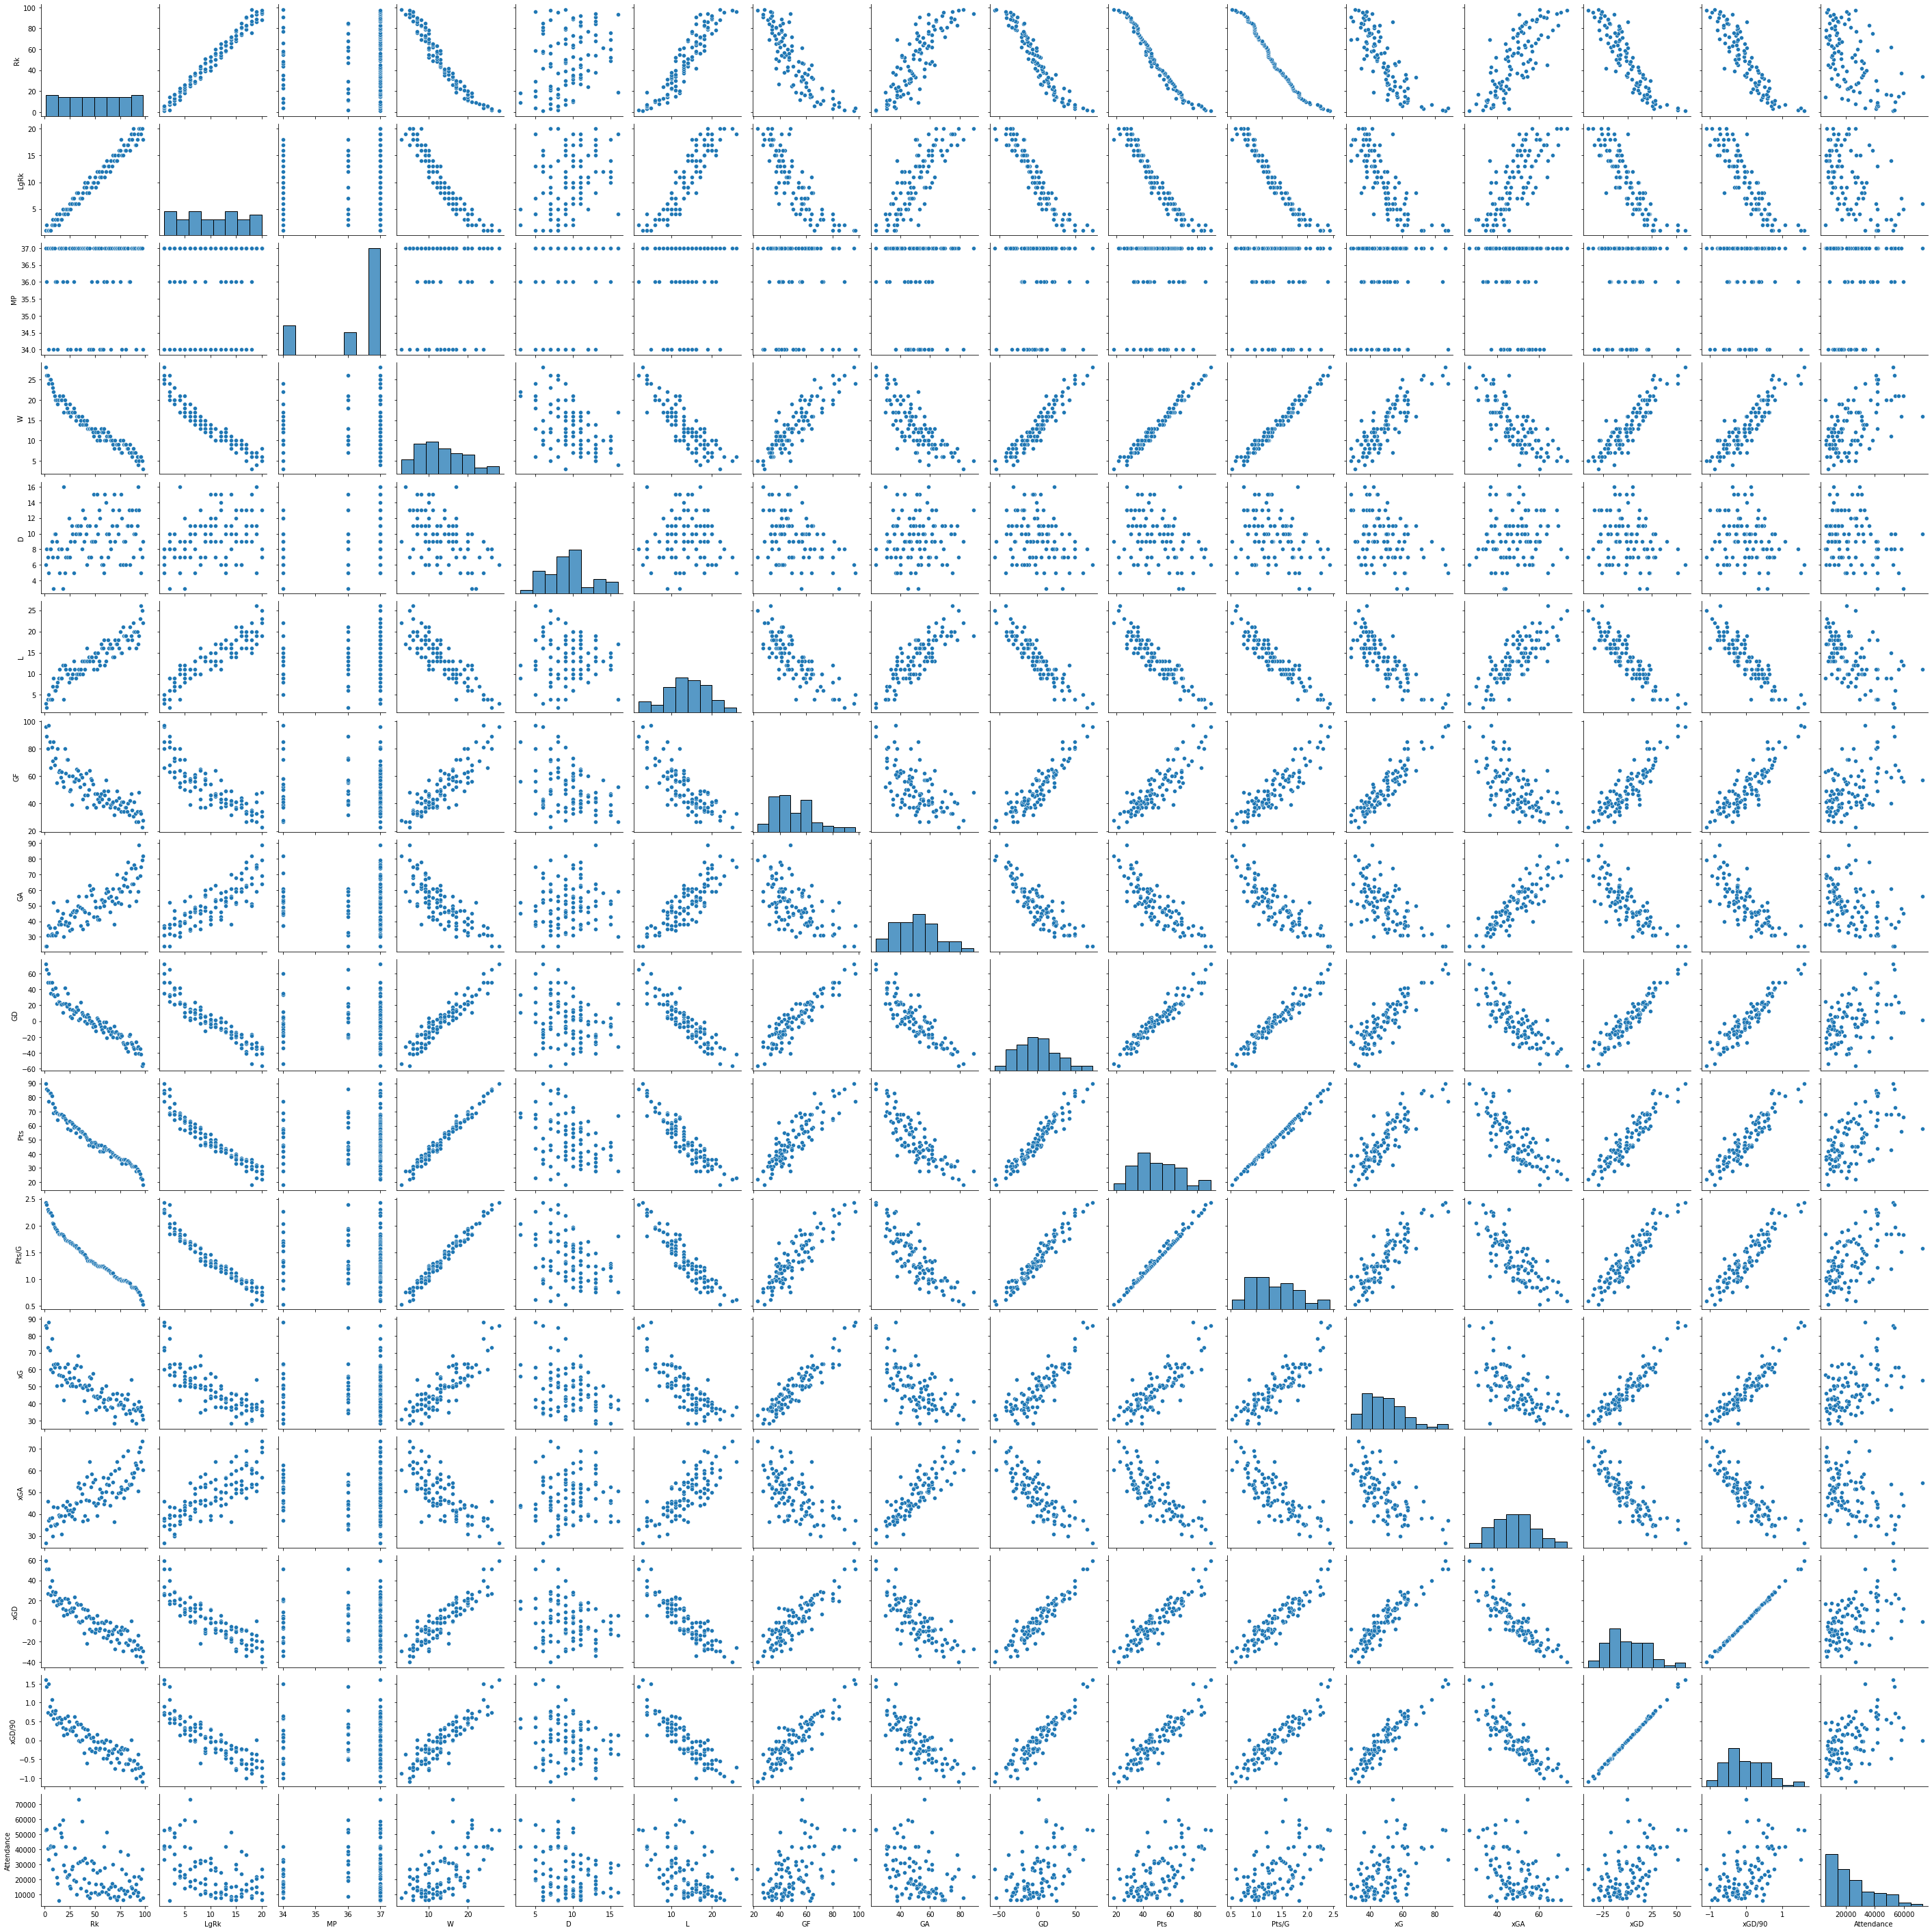

In [11]:
sns.pairplot(uefa)
plt.show()

Amb el pairplot podem veure la distribució de les dades per cada categoria. Hi ha moltes relacions directes e inverses. A MP les dades estàn disribuides només en 3 valors. L'últim paràmetre, Atendance, tampoc segeuix cap distribució clara.

Pel primer exemple he mirat [la web](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) amb els diferents tests d'hipòtesis facilitats a la bibliografia del curs. Crec que un bon primer test és mirar la relació entre els partits guanyats i la probabilitat de gol. Per aquest test he escollit el coeficient de correlació de Pearson.

In [14]:
#Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(uefa["xGA"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.989, p=0.610
Probably Gaussian


Pel primer exercici he escolit un test de normalitat, concretament el de Saphiro-Wilk, ja que demana només fer un estudi d'un atribut. En aquest cas he escollit la categoria de xGA (probabilitat de gol en contra), ja que al pairplot es veu amb una distribució més o menys normal. 

Un cop fet el càlcul, dóna que sí és probablement Gaussià, ja que dóna una p=0,610, que és superior a 005.

##Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

In [6]:
#Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(uefa["Pts"], uefa["GA"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.835, p=0.000
Probably dependent


El coeficient de correlació de Pearson ha donat 0,851, que és bastant proper a 1, el que vol dir que hi ha una correlació positiva gairebé linear entre els partits guanyats (W) i la probabilitat de gol (xG).

El p value és igual a 0,000, el que vol dir que la evidència a favor de la hipòtesis alternativa és inqüestionable.

##Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.